In [1]:
!pip install tensorflow scikit-learn matplotlib


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [3]:
# Load Boston Housing dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=42
)

# Scale features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


57026/57026 [==============================] - 0s 1us/step


In [4]:
model = models.Sequential([
    layers.Input(shape=(x_train.shape[1],)),  # Use Input layer to avoid warning
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')


In [5]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    validation_split=0.2,
    verbose=0  # set to 1 if you want to see progress
)


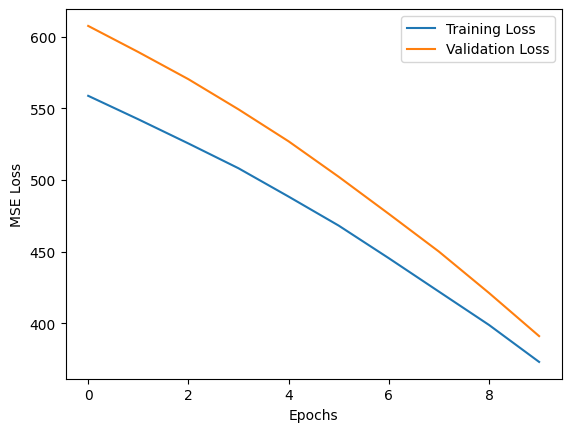

In [6]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()


In [7]:
mse = model.evaluate(x_test, y_test, verbose=0)
print("Test MSE:", mse)


Test MSE: 366.923828125
